# First Analysis - RJ Election 2022
Apresenta a primeira análise dos dados com uma exibição base em python.

Exibe o tipo dos dados coletados em tabelas e permite uma observação primitiva de sua organização.

In [1]:
# Import de bibliotecas
try:
  import matplotlib
  print('Matplotlib is already installed!')
  print(f'Matplotlib version: {matplotlib.__version__}\n')
except ImportError:
  print('Installing Matplotlib...')
  !pip install matplotlib

try:
  import numpy
  print('Numpy is already installed!')
  print(f'Numpy version: {numpy.__version__}\n')
except ImportError:
  print('Installing Numpy...')
  !pip install numpy

try:
  import pandas
  print('Pandas is already installed!')
  print(f'Pandas version: {pandas.__version__}\n')
except ImportError:
  print('Installing Pandas...')
  !pip install pandas

try:
    import geopandas as gpd
    print('GeoPandas is already installed!')
    print(f'GeoPandas version: {gpd.__version__}\n')
except ImportError:
    print('Installing GeoPandas...')
    !pip install geopandas
    import geopandas as gpd
    print(f'GeoPandas version: {gpd.__version__}\n')

try:
  import pyarrow as pa
  print('PyArrow is already installed!')
  print(f'PyArrow version: {pa.__version__}\n')
except ImportError:
  print('Installing PyArrow...')
  !pip install pyarrow

try:
  import os
  print('OS is already installed!')
except ImportError:
  print('Installing OS...')
  !pip install os


Matplotlib is already installed!
Matplotlib version: 3.9.0

Numpy is already installed!
Numpy version: 2.3.4

Pandas is already installed!
Pandas version: 2.3.3

GeoPandas is already installed!
GeoPandas version: 1.1.1

PyArrow is already installed!
PyArrow version: 16.1.0

OS is already installed!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow as pa

import geopandas as gpd

In [4]:
# Caminho dos dados

path_alfabetizacao_csv = "./DADOS/Alfabetizacao/Agregados_por_municipios_alfabetizacao_BR.csv"
path_seguranca_csv = "./DADOS/Seguranca/BaseMunicipioMensal.csv"
path_votos_TSE_csv = "./DADOS/TSE/votacao_candidato_munzona_2022_RJ.csv"
path_malha_zip = "./DADOS/MalhaGeometrica/rj_municipios.zip"


# Leitura dos arquivos para dataframes -> usando pandas

# Lê o arquivo CSV e carrega em um DataFrame
df_alfabetizacao = pd.read_csv(path_alfabetizacao_csv,  encoding='latin1', sep=';')
df_seguranca = pd.read_csv(path_seguranca_csv,  encoding='latin1', sep=';')

# df_votos = pd.read_csv(path_votos_TSE_csv, encoding='latin1', sep='')
df_votos = pd.read_csv(path_votos_TSE_csv, encoding='latin1', sep=';')

In [5]:
# Verificação das primeiras linhas dos dados

# Exibe as primeiras 5 linhas do DataFrame
print("Data frame de alfabetização: \n")
print(df_alfabetizacao.head())

print("Data frame de segurança: \n")
print(df_seguranca.head())
# print(df_votos.head())

Data frame de alfabetização: 

    CD_MUN                 NM_MUN  V00644  V00645  V00646  V00647  V00648  \
0  1100015  Alta Floresta D'Oeste    1644    1514    1557    1643    1511   
1  1100023              Ariquemes    7666    8193    8053    7656    7741   
2  1100031                 Cabixi     373     246     306     373     402   
3  1100049                 Cacoal    6299    7292    7282    7029    6858   
4  1100056             Cerejeiras    1142    1044    1275    1285    1222   

   V00649  V00650  V00651  ...  V00996  V00997  V00998  V00999  V01000  \
0    1576    1541    1352  ...     109     226     119      40      73   
1    7404    6582    5774  ...     484    1106     506     328     591   
2     425     338     399  ...       3      29      21       3       9   
3    6765    5774    5377  ...     489    1181     401     279     430   
4    1142    1083     967  ...     101     172      84      36      90   

   V01001  V01002  V01003  V01004  V01005  
0      51     107

In [6]:
rj = gpd.read_file('./DADOS/MalhaGeometrica/rj_municipios/33MUE250GC_SIR.shp')
rj.head()


,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.0895 -21.62893, -42.08912 -21.62..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


<Axes: >

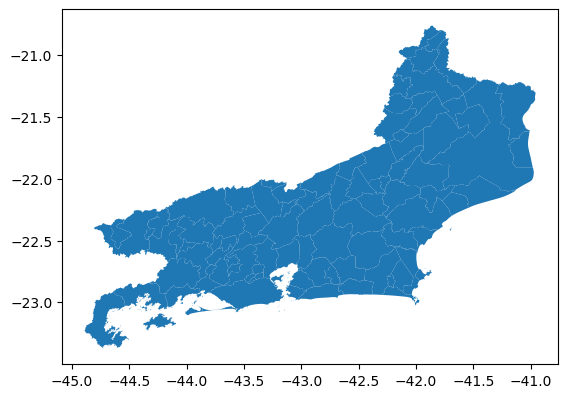

In [7]:
rj.plot()

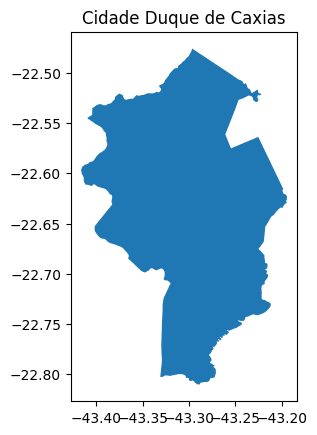

In [8]:
duque_de_caxias_city = rj[rj.NM_MUNICIP == 'DUQUE DE CAXIAS'].reset_index(drop=True)
ax2 = duque_de_caxias_city.plot()
ax2.set_title('Cidade Duque de Caxias');

In [10]:
# Solução: Adicionar encoding='latin-1'
df_raw = pd.read_csv(path_votos_TSE_csv, header=None, encoding='latin-1')

# O resto do seu código de tratamento manual funcionará normalmente:
df_votos = df_raw[0].str.replace('"', '').str.split(';', expand=True)

df_votos.columns = df_votos.iloc[0]
df_votos = df_votos[1:] 

df_votos = df_votos.reset_index(drop=True)

# Agora os prints devem funcionar
print(df_votos.head())
print(df_votos.columns[:10])
print(df_votos.shape)

0  DT_GERACAO HH_GERACAO ANO_ELEICAO CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0  30/10/2025   03:30:41        2022               2  Eleição Ordinária   
1  30/10/2025   03:30:41        2022               2  Eleição Ordinária   
2  30/10/2025   03:30:41        2022               2  Eleição Ordinária   
3  30/10/2025   03:30:41        2022               2  Eleição Ordinária   
4  30/10/2025   03:30:41        2022               2  Eleição Ordinária   

0 NR_TURNO CD_ELEICAO                      DS_ELEICAO  DT_ELEICAO  \
0        1        546  ELEIÇÕES GERAIS ESTADUAIS 2022  02/10/2022   
1        1        546  ELEIÇÕES GERAIS ESTADUAIS 2022  02/10/2022   
2        1        546  ELEIÇÕES GERAIS ESTADUAIS 2022  02/10/2022   
3        1        546  ELEIÇÕES GERAIS ESTADUAIS 2022  02/10/2022   
4        1        546  ELEIÇÕES GERAIS ESTADUAIS 2022  02/10/2022   

0 TP_ABRANGENCIA  ... DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO     NM_COLIGACAO  \
0              E  ...                  #NULO#  1900016

In [11]:
df_votos.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,30/10/2025,03:30:41,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,190001683148,PARTIDO ISOLADO,PRTB,N,0,Válido,0,4,NÃO ELEITO
1,30/10/2025,03:30:41,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,190001683148,PARTIDO ISOLADO,PRTB,N,0,Válido,0,4,NÃO ELEITO
2,30/10/2025,03:30:41,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,190001683148,PARTIDO ISOLADO,PRTB,N,0,Válido,0,4,NÃO ELEITO
3,30/10/2025,03:30:41,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,190001683148,PARTIDO ISOLADO,PRTB,N,0,Válido,0,4,NÃO ELEITO
4,30/10/2025,03:30:41,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,190001683148,PARTIDO ISOLADO,PRTB,N,0,Válido,0,4,NÃO ELEITO


In [13]:
# Quantidade de municipios em cada dataframe (usando .unique)
print("Quantidade de municípios DF_Alfabetização:", df_alfabetizacao['CD_MUN'].nunique())
print("Quantidade de municípios DF_Segurança:", df_seguranca['fmun_cod'].nunique())
print("Quantidade de municípios Malha Geométrica RJ:", rj['CD_GEOCODM'].nunique())
print("Quantidade de municípios DF_Votos_TSE:", df_votos['CD_MUNICIPIO'].nunique())

Quantidade de municípios DF_Alfabetização: 5570
Quantidade de municípios DF_Segurança: 92
Quantidade de municípios Malha Geométrica RJ: 92
Quantidade de municípios DF_Votos_TSE: 92


In [14]:
# Células em branco
print("Quantidade de células em branco DF_Alfabetização:", df_alfabetizacao.isnull().sum().sum())
print("Quantidade de células em branco DF_Segurança:", df_seguranca.isnull().sum().sum())
print("Quantidade de células em branco Malha Geométrica RJ:", rj.isnull().sum().sum())
print("Quantidade de células em branco DF_Votos_TSE:", df_votos.isnull().sum().sum())


Quantidade de células em branco DF_Alfabetização: 0
Quantidade de células em branco DF_Segurança: 0
Quantidade de células em branco Malha Geométrica RJ: 0
Quantidade de células em branco DF_Votos_TSE: 0


In [15]:
# Dados duplicados
print("Quantidade de dados duplicados DF_Alfabetização:", df_alfabetizacao.duplicated().sum())
print("Quantidade de dados duplicados DF_Segurança:", df_seguranca.duplicated().sum())
print("Quantidade de dados duplicados Malha Geométrica RJ:", rj.duplicated().sum())
print("Quantidade de dados duplicados DF_Votos_TSE:", df_votos.duplicated().sum())

Quantidade de dados duplicados DF_Alfabetização: 0
Quantidade de dados duplicados DF_Segurança: 0
Quantidade de dados duplicados Malha Geométrica RJ: 0
Quantidade de dados duplicados DF_Votos_TSE: 0


In [16]:
# Filtro das colunas necessárias de alfabetização

path_alfabetizacao_csv_filtrado = "./DADOS/Alfabetizacao/por_municipio_filtrado_categorias_totais.csv"

if not os.path.exists(path_alfabetizacao_csv_filtrado):
    # Le CSV novamente por garantia
    df_alfabetizacao = pd.read_csv(path_alfabetizacao_csv, sep=';', encoding='latin1')

    df_alfabetizacao.columns = df_alfabetizacao.columns.str.strip()
    print("Colunas do CSV:", df_alfabetizacao.columns.tolist())

    colunas_base = ["CD_MUN", "NM_MUN"]
    colunas_base_existentes = [c for c in colunas_base if c in df_alfabetizacao.columns]

    if len(colunas_base_existentes) < len(colunas_base):
        raise ValueError(f"Algumas colunas base não existem no CSV: {colunas_base}.\nColunas existentes: {df_alfabetizacao.columns.tolist()}")

    # Filtrar apenas as colunas V00748 a V00760 presentes no CSV
    colunas_alfabetizacao = []
    for i in range(48, 61):  # de 48 até 60
        col = f"V007{i}"
        if col in df_alfabetizacao.columns:
            colunas_alfabetizacao.append(col)


    colunas_desejadas = colunas_base_existentes + colunas_alfabetizacao

    df_filtrado = df_alfabetizacao[colunas_desejadas]

    # Salvar CSV filtrado pronto
    df_filtrado.to_csv(path_alfabetizacao_csv_filtrado, sep=';', index=False, quoting=1)

    print(f"✅ CSV filtrado criado com sucesso: {path_alfabetizacao_csv_filtrado}")
else:
    print(f"📌 Arquivo já existe: {path_alfabetizacao_csv_filtrado}")

# Filtro das linhas necessárias de alfabetização - SOMENTE RJ
path_tse = "./DADOS/TSE/municipios_brasileiros_tse.csv"
path_final = "./DADOS/Alfabetizacao/por_municipio_RJ.csv"
if not os.path.exists(path_final):

    df_alf = pd.read_csv(path_alfabetizacao_csv_filtrado, sep=';', encoding='latin1')
    df_tse = pd.read_csv(path_tse, sep=',', encoding='latin1')

    # Normalização
    df_alf.columns = df_alf.columns.str.strip()
    df_tse.columns = df_tse.columns.str.strip()

    # Converter COD_IBGE para string e padronizar com zeros à esquerda
    df_alf["CD_MUN"] = df_alf["CD_MUN"].astype(str).str.zfill(7)
    df_tse["codigo_ibge"] = df_tse["codigo_ibge"].astype(str).str.zfill(7)

    # Filtrar apenas municípios do RJ usando merge
    df_merged = df_alf.merge(df_tse[["uf", "codigo_ibge"]],
                              left_on="CD_MUN", right_on="codigo_ibge",
                              how="inner")

    df_rj = df_merged[df_merged["uf"] == "RJ"]

    colunas_base = ["CD_MUN", "NM_MUN"]
    colunas_alfabetizacao = []
    for i in range(48, 61):
        col = f"V007{i}"
        if col in df_alfabetizacao.columns:
            colunas_alfabetizacao.append(col)
    colunas_desejadas = colunas_base + colunas_alfabetizacao

    df_rj_final = df_rj[colunas_desejadas]

    df_rj_final.to_csv(path_final, sep=';', index=False, quoting=1)

    print(f"✅ Arquivo filtrado do RJ criado com sucesso: {path_final}")
else:
    print(f"📌 Arquivo já existe: {path_final}")



📌 Arquivo já existe: ./DADOS/Alfabetizacao/por_municipio_filtrado_categorias_totais.csv
📌 Arquivo já existe: ./DADOS/Alfabetizacao/por_municipio_RJ.csv


In [17]:
# Filtro dos dados de segurança - por colunas
path_seg_ano = "./DADOS/Seguranca/seguranca_municipios_ano.csv"

if not os.path.exists(path_seg_ano):
    path_seg = "./DADOS/Seguranca/BaseMunicipioMensal.csv"
    df_seg = pd.read_csv(path_seg, sep=';', encoding='latin1', engine='python')

    df_seg.columns = df_seg.columns.str.strip()

    colunas_base = ["fmun_cod", "fmun", "ano"]
    colunas_totais = ["total_roubos", "total_furtos", "registro_ocorrencias"]

    # Verificar se todas as colunas existem
    for col in colunas_base + colunas_totais:
        if col not in df_seg.columns:
            raise KeyError(f"Coluna '{col}' não encontrada. Colunas disponíveis: {df_seg.columns.tolist()}")

    df_seg = df_seg[colunas_base + colunas_totais]

    # Agrupar por município e ano, somando os valores
    df_agrupado = df_seg.groupby(["fmun_cod", "fmun", "ano"], as_index=False).sum()

    df_agrupado.to_csv(path_seg_ano, sep=';', index=False, quoting=1)
    print(f"✅ CSV de segurança anual criado: {path_seg_ano}")

else:
    print(f"📌 Arquivo já existe, não será recriado: {path_seg_ano}")


# Filtro dos dados de segurança - por linhas, mantendo apenas o ano de 2021 como interesse
path_seg_2021 = "./DADOS/Seguranca/seguranca_municipios_2021.csv"

if not os.path.exists(path_seg_2021):
    df_ano = pd.read_csv(path_seg_ano, sep=';', encoding='latin1', engine='python')

    # ---- Filtrar apenas o ano de 2021 ----
    df_2021 = df_ano[df_ano["ano"] == 2021].copy()

    # ---- Salvar CSV filtrado ----
    df_2021.to_csv(path_seg_2021, sep=';', index=False, quoting=1)
    print(f"✅ CSV de segurança apenas 2021 criado: {path_seg_2021}")

else:
    print(f"📌 Arquivo já existe, não será recriado: {path_seg_2021}")

📌 Arquivo já existe, não será recriado: ./DADOS/Seguranca/seguranca_municipios_ano.csv
📌 Arquivo já existe, não será recriado: ./DADOS/Seguranca/seguranca_municipios_2021.csv


In [ ]:
# Filtro dos dados de votos
path_votos_TSE_csv = "./DADOS/TSE/votacao_candidato_munzona_2022_RJ.csv" # Arquivo de origem
path_votos_filtrados = "./DADOS/TSE/votos_filtrados.csv" # Arquivo de destino

if not os.path.exists(path_votos_filtrados):
    df_urnas = pd.read_csv(path_votos_TSE_csv, sep=';', encoding='latin1', engine='python')

    df_urnas.columns = df_urnas.columns.str.strip()

    colunas_votos = [
        'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO',
        'CD_MUNICIPIO', 'NM_MUNICIPIO',
        'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
        'NM_TIPO_DESTINACAO_VOTOS','QT_VOTOS_NOMINAIS_VALIDOS', 'DS_SIT_TOT_TURNO'
    ]   

    # Verificar se todas as colunas existem
    for col in colunas_votos:
        if col not in df_urnas.columns:
            raise KeyError(f"Coluna '{col}' não encontrada. Colunas disponíveis: {df_urnas.columns.tolist()}")

    df_urnas = df_urnas[colunas_votos].copy() # Adicionado .copy() por segurança

    # Salvar no caminho de destino (path_votos_filtrados)
    df_urnas.to_csv(path_votos_filtrados, sep=';', index=False, quoting=1)
    
    # Imprimir o caminho de destino (path_votos_filtrados)
    print(f"✅ CSV de votos filtrados criado: {path_votos_filtrados}")

else:
    print(f"📌 Arquivo já existe, não será recriado: {path_votos_filtrados}")



df_urnas.head()

✅ CSV de votos filtrados criado: ./DADOS/TSE/votos_filtrados.csv


,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,2,Eleição Ordinária,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58912,SANTA MARIA MADALENA,28193,ILSON DE ARAUJO,28,PRTB,Partido Renovador Trabalhista Brasileiro,N,0,Válido,0,4,NÃO ELEITO
1,2,Eleição Ordinária,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58912,SANTA MARIA MADALENA,28100,MARCELO TADEU AZEVEDO RODRIGUES,28,PRTB,Partido Renovador Trabalhista Brasileiro,N,0,Válido,0,4,NÃO ELEITO
2,2,Eleição Ordinária,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58912,SANTA MARIA MADALENA,28033,JOÃO LEOMI SILVA NUNES,28,PRTB,Partido Renovador Trabalhista Brasileiro,N,0,Válido,0,4,NÃO ELEITO
3,2,Eleição Ordinária,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58912,SANTA MARIA MADALENA,28467,ELIETE MOREIRA DE SOUZA DA COSTA,28,PRTB,Partido Renovador Trabalhista Brasileiro,N,0,Válido,0,4,NÃO ELEITO
4,2,Eleição Ordinária,546,ELEIÇÕES GERAIS ESTADUAIS 2022,58912,SANTA MARIA MADALENA,28660,TATIANE MENEDES TEIXEIRA,28,PRTB,Partido Renovador Trabalhista Brasileiro,N,0,Válido,0,4,NÃO ELEITO


In [19]:
# Resumo das modificações - adicionar também no docs!

# Plot de informações estatísticas

In [20]:
# Apresentar imagem do OMT-G 